# Notebook: Getting started

### Import standard modules

In [39]:
import numpy as np
import matplotlib.pyplot as plt

In [37]:
%matplotlib inline

## 1. The DIC module

In [2]:
import dicData

### To look at a function, use inspect

In [28]:
import inspect

# Defin the function you want to see
func = dicData.dic3D.scatter2d

# print the function
lines = inspect.getsource(func)
print(lines)

    def scatter2d(self, x=None, y=None, cs=None, colorsMap='viridis',vmin=0,vmax=0.005, s=1, label=None, axisVis="off"):
        
        # define terms
        if x==None:
            x=self.data['x [mm]']
            y=self.data['y [mm]']
        if cs == None:
            cs=self.data['maximum shear strain [S]']
            label='$\\gamma$ $_{shear}^{max}$ [  ]'
        xDim = np.max(x)-np.min(x)
        yDim = np.max(y)-np.min(y)
        
        # plot data
        fig = plt.figure(figsize=(xDim+1,yDim+1))
        ax = fig.add_subplot(111)
        cm = plt.get_cmap(colorsMap)
        cNorm = matplotlib.colors.Normalize(vmin=vmin, vmax=vmax)
        scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cm)
        ax.scatter(x,y,c=scalarMap.to_rgba(cs),s=s)
        
        ax.axis(axisVis)
        scalarMap.set_array(cs)
        cb = fig.colorbar(scalarMap,shrink=0.8)
        cb.set_label(label=label,size=12)



### Look at the DIC data

In [6]:
# initialise the data
testData = dicData.dic3D('./exampleData/dic/data_490.csv')

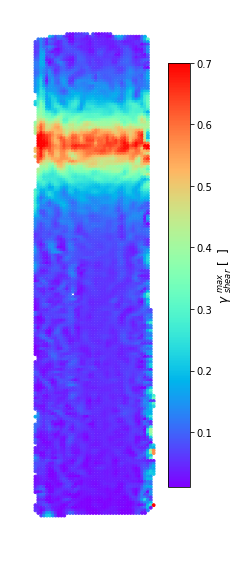

In [27]:
# plot the data in 2D
testData.scatter2d(vmin=0.011,vmax=0.7,s=8,colorsMap='rainbow')

### Linearise the data and plot it in  figure

Text(0,0.5,'$\\gamma$ $_{shear}^{max}$ [  ]')

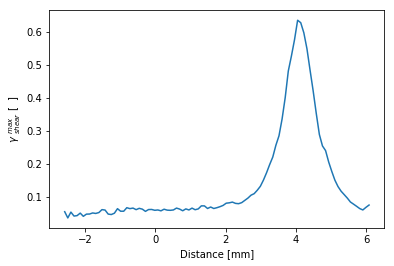

In [42]:
# linearise
testData.lineariseValues()

# plot the data in a figure
x = testData.linearised_bins
y = testData.linearised_plotValsMeans
plt.plot(x,y)

plt.xlabel('Distance [mm]')
plt.ylabel('$\\gamma$ $_{shear}^{max}$ [  ]')

### Load multiple data sets

In [45]:
dataNameFirst = 1
dataNameLast = 590
skip = 20

dataNames=[]
for i in range(dataNameFirst,dataNameLast+1,skip):
    if i < 10:
        i_name = '00'+str(i)
    if 10 <= i < 100:
        i_name = '0'+str(i)
    if 100 <= i < 1000:
        i_name = str(i)
    dataNames.append(i_name)
    
dataList=[]
for dataName in dataNames:
    globals()['data_'+dataName] = dicData.dic3D("./exampleData/dic/data_"+dataName+".csv")
    dataList.append(globals()['data_'+dataName])

In [46]:
# linearise the data
for dataX in dataList:
    dataX.lineariseValues(plotVals=dataX.data['maximum shear strain [S]'])

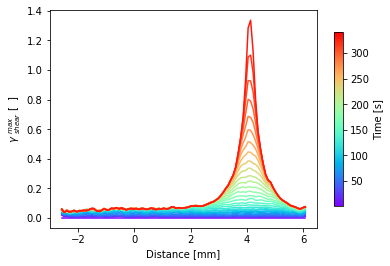

In [47]:
plt.figure()

iMax=len(dataList)

for i,data in enumerate(dataList[:]):
    x = data.linearised_bins
#     x = np.max(x) - x
    y = data.linearised_plotValsMeans
    plt.plot(x,y, c=plt.cm.rainbow(i/iMax))
    
plt.xlabel('Distance [mm]')
plt.ylabel('$\\gamma$ $_{shear}^{max}$ [  ]')

dataList[-1].plotColourbar(vMin=1,vMax=341,label='Time [s]')

### Take some data points on the 2D linescan and plot their evolution with time

In [52]:
%matplotlib qt

In [53]:
# Use of final data set is useful
dataList[-2].clickLineScan()

In [54]:
%matplotlib inline

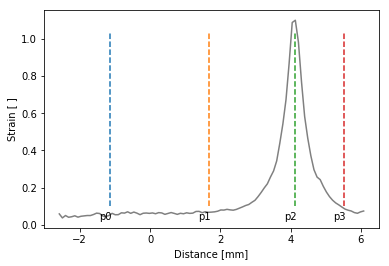

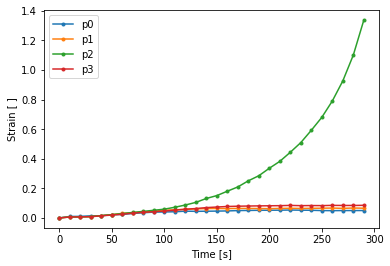

In [55]:
plt.figure()
plt.plot(dataList[-2].linearised_bins,dataList[-2].linearised_plotValsMeans,'grey')
for n in range(len(dataList[-2].clickCoords)):
    plt.axvline(x=dataList[-2].clickCoords[n][0],ymin=0.1,ymax=0.9,linestyle='--',color='C'+str(n))
    plt.text(dataList[-2].clickCoords[n][0]-0.3,0.03,'p'+str(n))
    
plt.xlabel('Distance [mm]')
plt.ylabel('Strain [ ]')

plt.figure()
for n in range(len(dataList[-2].clickCoords)):

    time=[]
    plotData=[]

    for i,data in enumerate(dataList):
        positionVal = data.find_nearest(data.linearised_bins,dataList[-2].clickCoords[n][0])
        idx = data.linearised_bins.tolist().index(positionVal)

        plotData.append(data.linearised_plotValsMeans[idx])
        time.append(i*10)

    plt.plot(time,plotData,'.-',label='p'+str(n))
    plt.xlabel('Time [s]')
    plt.ylabel('Strain [ ]')

plt.legend()

### Plot 2D with 3D as time

In [56]:
def addTo3DPlot(timeStep=None,y=None,z=None,zMax=None):

    x = np.ones(len(y))*timeStep
    y = np.max(y) - y
    z = z

    for i in range((len(x))-1):
            ax.plot(x[i:i+2], y[i:i+2], z[i:i+2], color=plt.cm.viridis(z[i]/zMax))

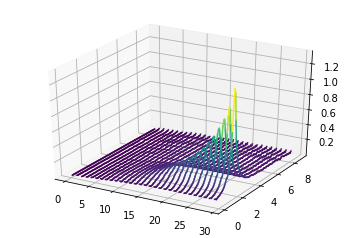

In [57]:
fig, ax = plt.subplots(subplot_kw={'projection': '3d'})
zMax = np.nanmax(dataList[-2].linearised_plotValsMeans)
for i,dataX in enumerate(dataList):
    addTo3DPlot(timeStep=i,y=dataX.linearised_bins,z=dataX.linearised_plotValsMeans,zMax=zMax)

## 2. Getting stress-strain relationships

In [59]:
import rigData
import extensometryData

In [62]:
extensometry = extensometryData.extensometryData("./exampleData/extensometry/dicExtensometry.csv")
rig = rigData.rigData("./exampleData/rig/rigData.txt")

### Strain data from the extensometry

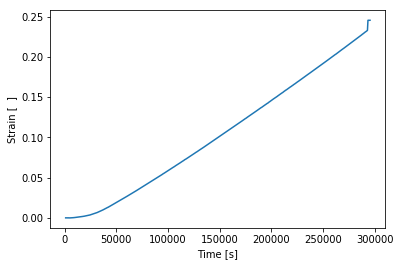

In [66]:
plt.figure()

data = extensometry
x = data.time
y = data.strain
plt.plot(x,y,'-',label='0.1% A, RT')

plt.xlabel('Time [s]')
plt.ylabel('Strain [  ]')

plt.show()

### Stress data from the rig data

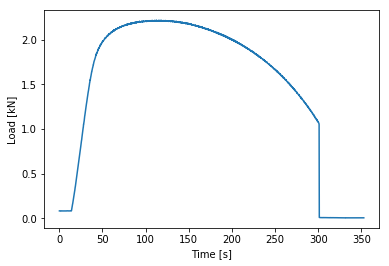

In [72]:
data = rig
x = data.time
y = data.load

plt.plot(x,y)

plt.xlabel('Time [s]')
plt.ylabel('Load [kN]')

plt.show()